pi: 3.1528


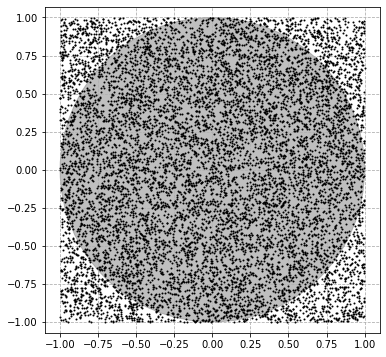

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
%matplotlib inline

np.random.seed(1)

n = 10000
r = 1.0
a,b = 0.0,0.0
xmin, xmax = a-r, a+r
ymin, ymax = b-r, b+r

#随机生成n=1000个点（重要，python随机生成一定范围内一定大小数组）
x = np.random.uniform(xmin,xmax,n)
y = np.random.uniform(ymin,ymax,n)


fig = plt.figure(figsize=(6,6))
axes = fig.add_subplot(1,1,1)#添加子图
#画子图
plt.plot(x,y,'ko',markersize = 1) #plot绘图 markersize表示点的大小；‘ro’r表示red，o表示圆圈
plt.axis('equal') #表示x轴和y轴的单位长度相同

#求点到圆心的距离
d = np.sqrt((x-a)**2 + (y-a)**2)

#res 得到圆中的点数
res = sum(np.where(d<r,1,0)) #numpy.where(conditon,x,y) 满足条件输出x，不满足输出y

pi = res/n*4
print('pi:',pi)
#计算pi的近似值，蒙特卡洛模拟方法，用统计值去近似真实值

#绘制圆形子图
circle = Circle(xy = (a,b), radius = r,alpha = 0.5, color = 'gray')
axes.add_patch(circle)#添加圆形子图
plt.grid(True,linestyle = '--',linewidth = 0.8)
plt.show()

#蒙特卡洛模拟是用统计值逼近真实值，展示了统计思想

In [2]:
m=100000  #要确保m足够大

Sum=0
import random
for i in range(m):
    x = random.random()        #返回随机生成的一个实数，它在[0,1)范围内。     
    y = x**2
    Sum+=y
 
R=Sum/m
 
print(R)

0.33238633224294584


In [3]:
n=100000   #n足够大
 
m=0                                  
 
import random
 
for i in range(n):
    x = random.random()
    y = random.random()
    if x**2>y:                       #表示该点位于曲线y=x^2的下面
        m=m+1
 
R=m/n
 
print(R)

0.33314


In [4]:
m=100000  #要确保m足够大
maxf=0

import random
 
for i in range(m):
    while True :
        x = random.randint(0,100)      
        y = random.randint(0,100) 
        z = random.randint(0,100) 
        if x**2+y**2+z**2<=10000 :
            break
    max=x+y+z
    if max>maxf :
        maxf=max
        xmax=x
        ymax=y
        zmax=z

print('maxf:',maxf,'xmax:',xmax,'ymax:',ymax,'zmax:',zmax)

maxf: 173 xmax: 59 ymax: 59 zmax: 55


In [5]:
import numpy as np


#首先要随机生成到达时间，到达时间需要进行一下排序，方可确定排队的先后顺序和点餐耗时：
#函数原型：  numpy.random.uniform(low,high,size)功能：从一个均匀分布[low,high)中随机采样，注意定义域是左闭右开，即包含low，不包含high.
arrivingtime = np.random.uniform(0,10,size = 20)
#.sort() 降序排列
arrivingtime.sort()
#点餐时间初始化
working = np.random.uniform(1,3,size = 20)

#到达时间、离开时间、空闲时间、等待时间初始化
startingtime = [0 for i in range(20)]
finishtime = [0 for i in range(20)]
waitingtime = [0 for i in range(20)]
emptytime = [0 for i in range(20)]

#对第一个人的情况单独处理
startingtime[0] = arrivingtime[0]
finishtime[0] = startingtime[0] + working[0]
waitingtime[0] = startingtime[0]-arrivingtime[0]

#第二个以后用循环
        
for i in range(1,len(arrivingtime)):
    if finishtime[i-1] > arrivingtime[i]:
        startingtime[i] = finishtime[i-1] # 你的理解
    else:
        startingtime[i] = arrivingtime[i]
        emptytime[i] = startingtime[i] - finishtime[i-1]
    finishtime[i] = startingtime[i] + working[i]
    waitingtime[i] = startingtime[i] - arrivingtime[i]
    
    #print(waitingtime[i])
print("average waiting time is %f" % np.mean(waitingtime))

average waiting time is 12.099123


In [6]:
import numpy as np

def forecast():
    #首先要随机生成到达时间，到达时间需要进行一下排序，方可确定排队的先后顺序和点餐耗时：
    #函数原型：  numpy.random.uniform(low,high,size)功能：从一个均匀分布[low,high)中随机采样，注意定义域是左闭右开，即包含low，不包含high.
    arrivingtime = np.random.uniform(0,10,size=20)
    #.sort() 降序排列
    arrivingtime.sort()
    #点餐时间
    working = np.random.uniform(1,3,size=20)

    startingtime = [0 for i in range(20)]
    finishtime = [0 for i in range(20)]
    waitingtime = [0 for i in range(20)]
    emptytime = [0 for i in range(20)]

    #对第一个人的情况单独处理
    startingtime[0] = arrivingtime[0]
    finishtime[0] = startingtime[0] + working[0]
    waitingtime[0] = startingtime[0]-arrivingtime[0]

    #第二个以后用循环
    
    #计算一下每人的等待时间：
    for i in range(1,len(arrivingtime)):
        if finishtime[i-1] > arrivingtime[i]:
            startingtime[i] = finishtime[i-1]
        else:
            startingtime[i] = arrivingtime[i]
            emptytime[i] = startingtime[i] - finishtime[i-1]
        finishtime[i] = startingtime[i] + working[i]
        waitingtime[i] = startingtime[i] - arrivingtime[i]
        #print(waitingtime[i])
    #print("average waiting time is %f" % np.mean(waitingtime))
    return np.mean(waitingtime)
sum = 0
for i in range(1000):
        sum+=forecast();
avg_waitingtime=sum/1000
print("average waiting time is %f" %avg_waitingtime )

average waiting time is 14.443071


In [7]:
import numpy as np

def forecast():
    #首先要随机生成到达时间，到达时间需要进行一下排序，方可确定排队的先后顺序和点餐耗时：
    #函数原型：  numpy.random.uniform(low,high,size)功能：从一个均匀分布[low,high)中随机采样，注意定义域是左闭右开，即包含low，不包含high.
    arrivingtime = np.random.uniform(0,10,size=20)
    #.sort() 降序排列
    arrivingtime.sort()
    #点餐时间
    working = np.random.uniform(1,3,size=20)

    startingtime = [0 for i in range(20)]
    finishtime = [0 for i in range(20)]
    waitingtime = [0 for i in range(20)]
    emptytime = [0 for i in range(20)]

    #对第一个人的情况单独处理
    startingtime[0] = arrivingtime[0]
    finishtime[0] = startingtime[0] + working[0]
    waitingtime[0] = startingtime[0] - arrivingtime[0]
    
    #对第二个人的情况单独处理
    startingtime[1] = arrivingtime[1]
    finishtime[1] = startingtime[1] + working[1]
    waitingtime[1] = startingtime[1] - arrivingtime[1]
    for i in range(2,len(arrivingtime)):
        if finishtime[i-1] > arrivingtime[i] and finishtime[i-2] > arrivingtime[i]:
            startingtime[i] = min(finishtime[i-1],finishtime[i-2])
        else:
            startingtime[i] = arrivingtime[i]
            emptytime[i] = startingtime[i] - finishtime[i-1]

        finishtime[i] = startingtime[i] + working[i]
        waitingtime[i] = startingtime[i] - arrivingtime[i]
        #print(waitingtime[i])
    #print("average waiting time is %f" % np.mean(waitingtime))
    return np.mean(waitingtime)
Sum = 0
for i in range(1000):
        Sum+=forecast()
avg_waitingtime=Sum/1000
print("average waiting time is %f" %avg_waitingtime )

average waiting time is 4.271651


In [8]:
import numpy as np

def forecast():
    #首先要随机生成到达时间，到达时间需要进行一下排序，方可确定排队的先后顺序和点餐耗时：
    #函数原型：  numpy.random.uniform(low,high,size)功能：从一个均匀分布[low,high)中随机采样，注意定义域是左闭右开，即包含low，不包含high.
    
    arrivingtime = np.random.uniform(0,3,size=20)   #假设这20个人在前3分钟到达
    
    #.sort() 降序排列
    arrivingtime.sort()
    #点餐时间
    working = np.random.uniform(1,3,size=20)

    startingtime = [0 for i in range(20)]
    finishtime = [0 for i in range(20)]
    waitingtime = [0 for i in range(20)]
    emptytime = [0 for i in range(20)]

    #对第一个人的情况单独处理
    startingtime[0] = arrivingtime[0]
    finishtime[0] = startingtime[0] + working[0]
    waitingtime[0] = startingtime[0] - arrivingtime[0]
    
    #对第二个人的情况单独处理
    startingtime[1] = arrivingtime[1]
    finishtime[1] = startingtime[1] + working[1]
    waitingtime[1] = startingtime[1] - arrivingtime[1]
    for i in range(2,len(arrivingtime)):
        if finishtime[i-1] > arrivingtime[i] and finishtime[i-2] > arrivingtime[i]:
            startingtime[i] = min(finishtime[i-1],finishtime[i-2])
        else:
            startingtime[i] = arrivingtime[i]
            emptytime[i] = startingtime[i] - finishtime[i-1]

        finishtime[i] = startingtime[i] + working[i]
        waitingtime[i] = startingtime[i] - arrivingtime[i]
        #print(waitingtime[i])
    #print("average waiting time is %f" % np.mean(waitingtime))
    return np.mean(waitingtime)
Sum = 0
for i in range(1000):
        Sum+=forecast();
avg_waitingtime=Sum/1000
print("average waiting time is %f" %avg_waitingtime )

average waiting time is 7.141998
